## 2주차 미션 소개 - EDA를 통한 머신러닝에 영향을 미치는 주요 변수 확인하기

* EDA 를 통해 어떤 피처가 이탈에 영향을 미치는지 확인하고 피처를 변경해서 모델의 성능 개선해 보기
* EDA는 데이터의 구조, 패턴, 이상치, 변수 간 관계 등을 파악하는 데 도움을 줍니다. 모델링 전 데이터에 대한 이해를 가능하게 합니다. 고객 이탈에 영향을 미치는 중요 변수를 식별함으로써, 더 효과적인 피처 선택을 할 수 있습니다. 불필요하거나 적절하지 않은 피처를 제거함으로써, 모델이 특정 데이터에 과적합되는 것을 방지할 수 있습니다. EDA과정은 모델의 복잡성을 줄이고, 성능을 개선하기 위한 피처엔지니어링 전략을 세우는데 중요합니다.

* 미션 데이터셋 소개
    * 해당 Kaggle 데이터셋( https://www.kaggle.com/blastchar/telco-customer-churn )은 통신사 고객 이탈(Churn)에 대한 정보를 담고 있습니다. IBM에서 제공한 이 데이터셋은 고객 유지에 필요한 행동을 예측하는 데 사용될 수 있으며, 고객 데이터를 분석하여 고객 유지 프로그램을 개발하는 데 도움이 됩니다.
    * 해당 데이터셋은 다음의 정보로 구성되어 있습니다.
        * 고객 인구 통계 정보(Demographic info): 고객의 성별, 연령대, 배우자 및 부양 가족의 유무(Gender, SeniorCitizen, Partner, Dependents) 등에 관한 정보가 포함되어 있습니다.
        * 고객 이탈(Churn) 정보: 서비스를 중단 여부에 대한 정보가 포함되어 있습니다.
        * 서비스 가입 정보(Services subscribed): 고객들이 가입한 서비스들, 예를 들어 전화, 다중 라인, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리밍 TV 및 영화( honeService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) 등에 대한 정보가 있습니다.
        * 고객 계정 정보(Customer account info): 고객이 얼마나 오래 서비스를 이용했는지, 계약 유형, 결제 방법, 무페이퍼 청구 여부, 월별 요금, 총 요금 (CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure)등의 정보가 담겨 있습니다.

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [44]:
# 미션 수행을 위해 데이터셋을 로드합니다.
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [45]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
# TotalCharges 가 수치 타입이 아니기 때문에 수치 연산을 위해 숫자 형태로 변경합니다.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [48]:
# TotalCharges 의 결측가 확인되므로 결측치를 카운트 합니다.
df.isnull().sum()
#TotalCharges에 11개의 결측치가 확인되었습니다.

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [49]:
# TotalCharges 의 결측치를 따로 저장합니다.
df_null = df.isnull()
df_null

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5575-GNVDE,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3668-QPYBK,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7795-CFOCW,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9237-HQITU,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2234-XADUH,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4801-JZAZL,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


F:\Anaconda3_envs\py39\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


<Axes: >

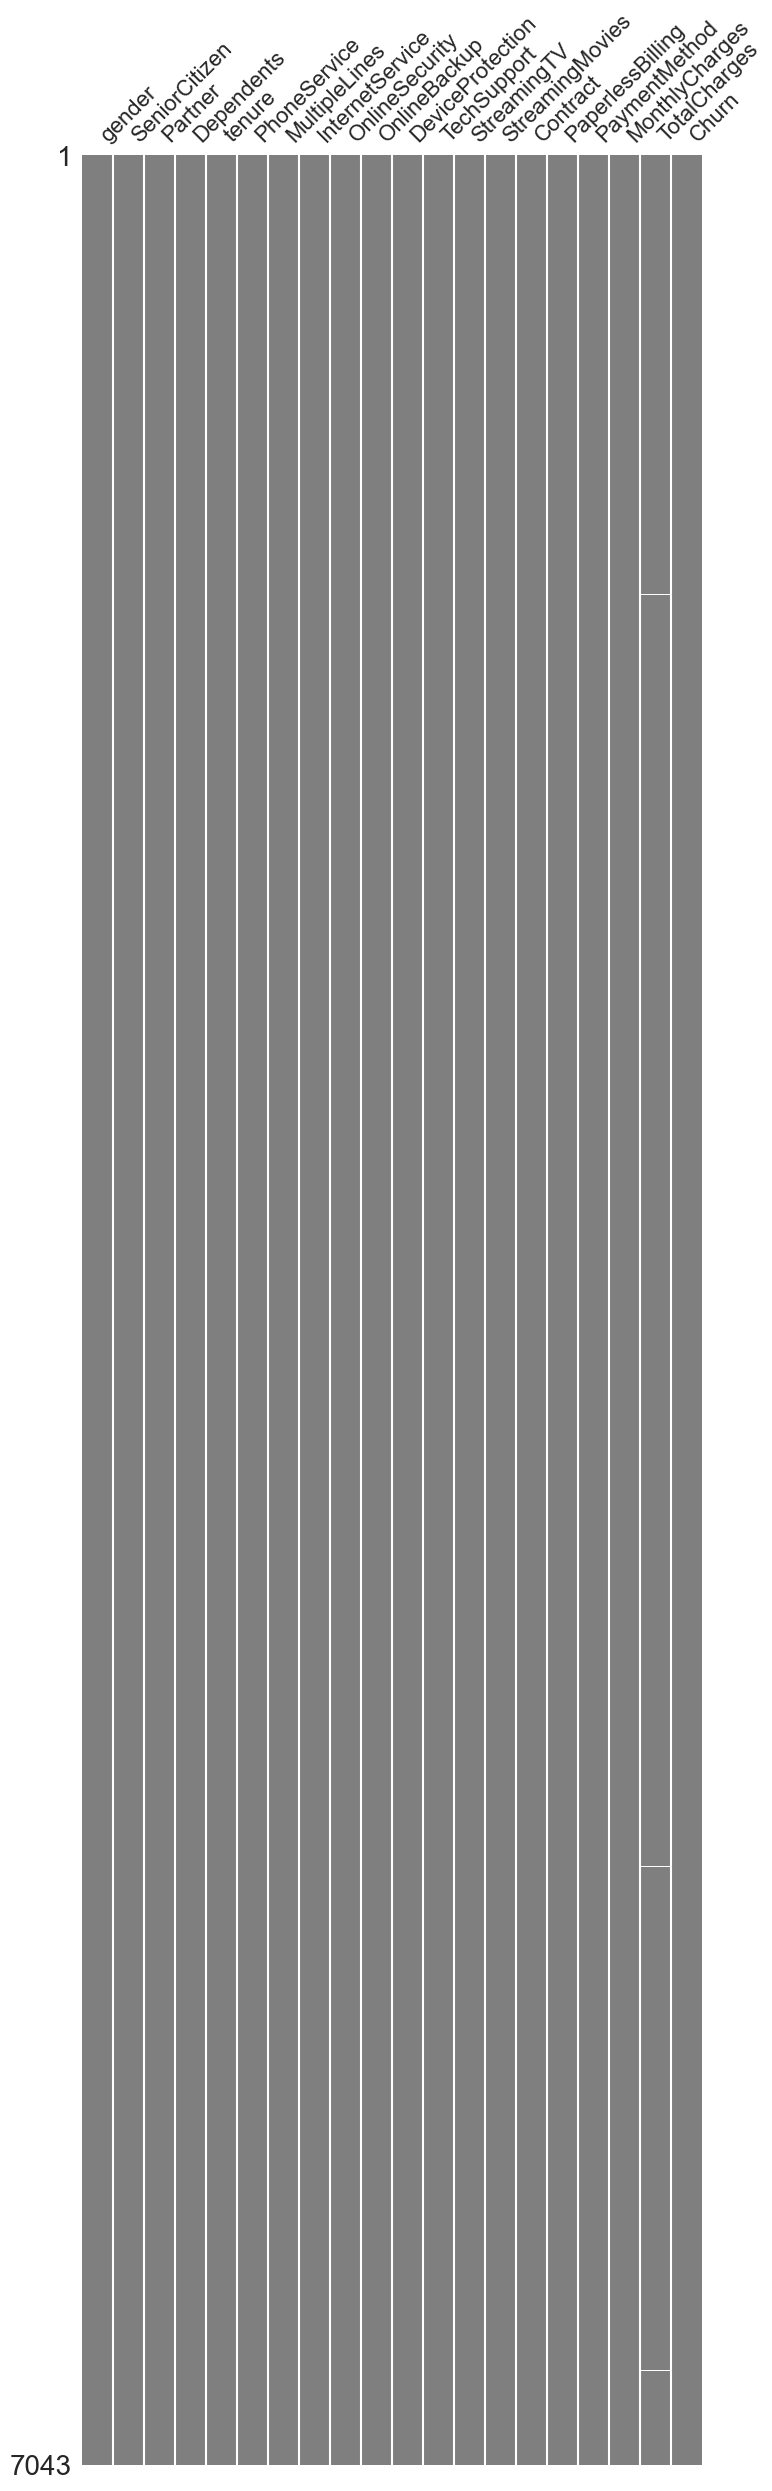

In [50]:
#결측치 시각화
import missingno as msno
fig, ax = plt.subplots(figsize=(8, 30))  # 가로 6, 세로 4 크기의 그래프
msno.matrix(df=df.iloc[:, :], color=(0.5, 0.5, 0.5), ax=ax)

In [51]:
# 결측치 처리
# monthlyCharges가 0이 아니므로 TotalCharges를 0으로 채워도 데이타의 왜곡이 발생한다고 판단되어(
# tenure(기간) * monthlyCharges(월별 요금)로 총 요금을 계산하여 결측치를 채워줍니다.

df["TotalCharges"] = df["TotalCharges"].fillna(df["MonthlyCharges"] * df["tenure"])

In [52]:
# 결측치 재확인
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

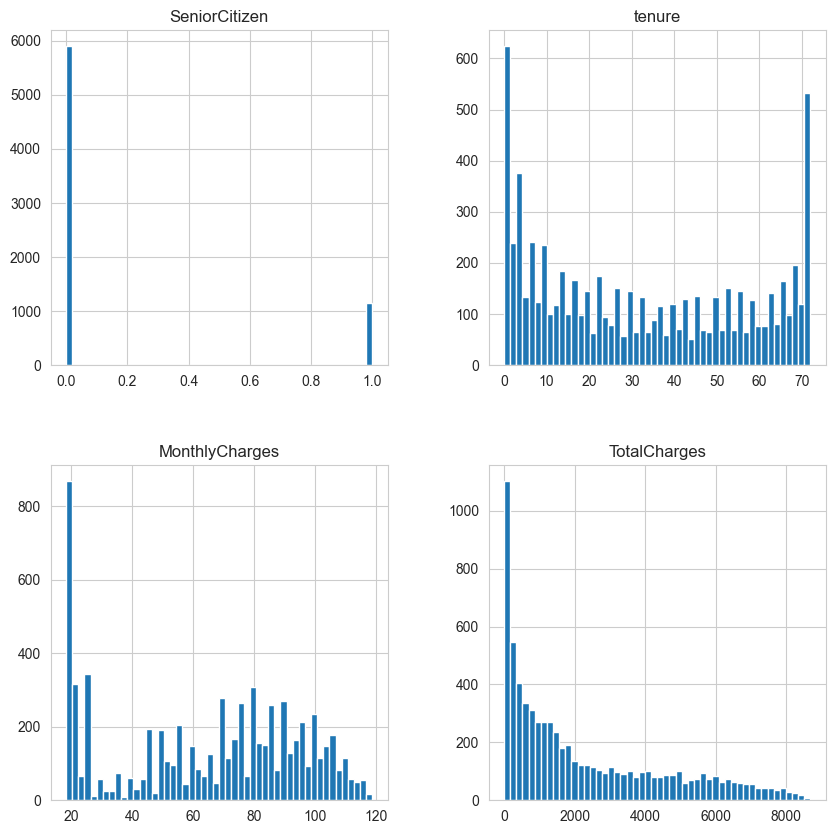

In [54]:
# 히스토그램으로 데이터 분포확인
df.hist(bins=50, figsize=(10, 10))

# 데이터 분포분석
- 머신러닝을 시도할때는 데이터의 분포를 정규분포로 만들어주는것이 좋습니다.
- 데이터의 분포를 확인해보니 TotalCharges(총 요금)이 왼쪽으로 치우쳐져 있습니다.
- 이를 정규분포로 만들어주기 위해 로그변환을 해주는것을 고려해야할듯 합니다.

## 📌 미션 1)  -  전체 수치 변수를 정답인 이탈 여부로 시각화하고 분석하기
데이터셋의 모든 수치형 변수를 이탈 여부에 따라 시각화하고 수치 구간에 따라 이탈률의 차이에 대해 분석해 주세요.
아래 이미지는 참고용으로 아래 이미지와 똑같이 시각화하지 않아도 됩니다. 이탈 여부를 잘 분석할 수 있는 시각화라면 어떤 시각화든 좋습니다.

<img src="https://i.imgur.com/oCQ9D0l.png">

✅⚡시각화와 분석하기
- 시각화의 목적은 인지의 다양성을 찾아, 다양한 인사이트를 찾기 위해서이므로 다양한 시각화로 각기 다른 인사이트를 찾기위해 다양한 시각화를 시도해본다
- 이에  따라서 그래프의 종류에 따라 다른 분석을 추구해봅니다.


In [55]:
# 위 예시처럼 수치 변수에 대한 히스토그램을 정답값으로 색상을 다르게 하여 히스토그램으로 시각화 해주세요.
df_chrun_yes = df[df["Churn"] == "Yes"]
df_churn_no = df[df["Churn"] == "No"]
df_chrun_yes.shape, df_churn_no.shape

((1869, 20), (5174, 20))

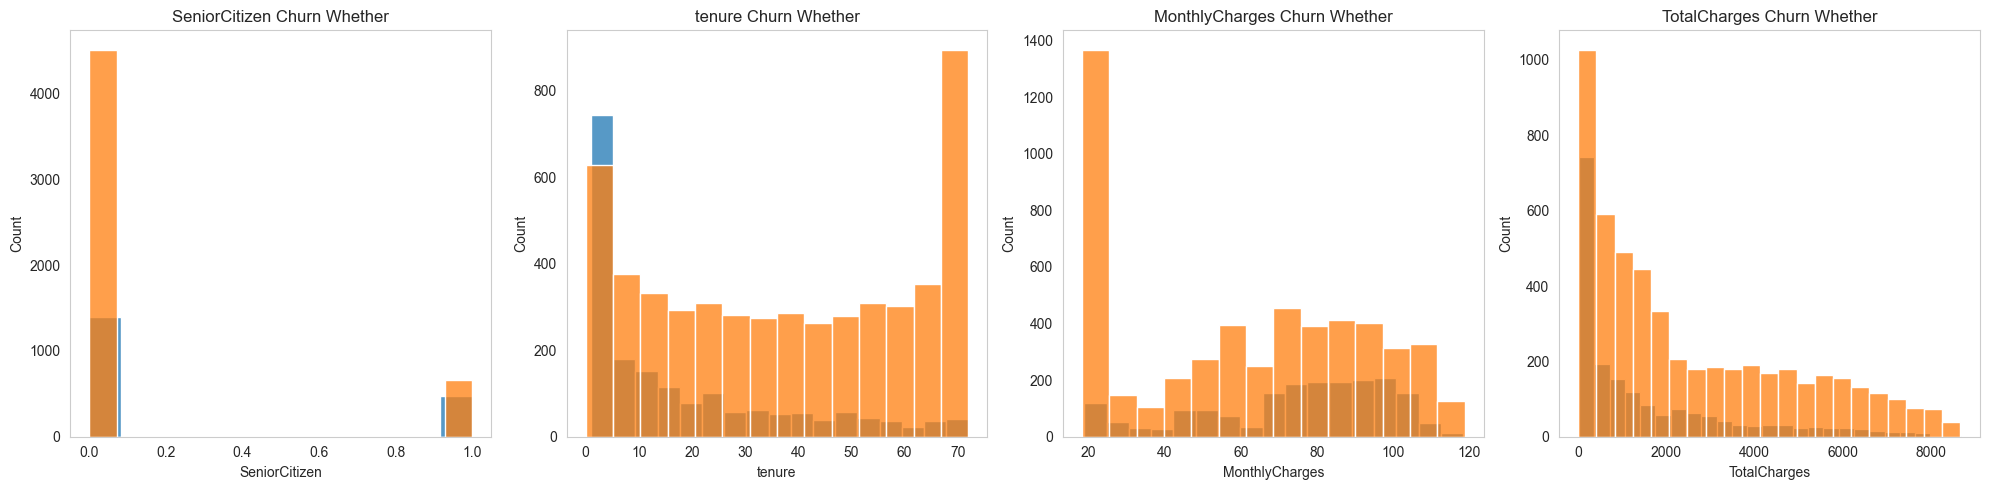

In [56]:
# 수치형 변수를 시각화 해주세요.
numeric_cols = ['SeniorCitizen','tenure','MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for idx, col in enumerate(numeric_cols[:]):
    axes[idx].set_title(col + ' Churn Whether')
    sns.histplot(df_chrun_yes[numeric_cols[idx]],ax=axes[idx])
    sns.histplot(df_churn_no[numeric_cols[idx]],ax=axes[idx])
    axes[idx].grid()
plt.tight_layout()

## 히스토그램으로 분석

- 시니어(노년계층)의 경우 이탈율과 유지율이 비슷한 수준입니다만 비노년층은 이탈율이 높습니다.
- 이탈자의 경우에는 초기에 이탈하는 비율이 상당히 높습니다. 이것은 초기유저를 충분히 잡아두지 못하는 서비스의 특징을 보여줍니다. 비 이탈자의 경우에는 장기유저의 비율이 높습니다. 초기서비스는 약한 반면, 장기이용자를 위한 서비스는 긍정적이라는 근거가 될수있습니다.
- 이탈자의 경우 월별 금액이 65~ 100달러 사이에 많이 분포됩니다. 이정도 금액의 범주에서 금액적 부담을 많이 느낀다고 보여집니다. 비이탈자는 월별 금액이 20달러에 많이 분포되어있습니다. 이로인해 이탈의 이유가 금액의 부담일 가능성이 높아 보입니다.
- 이탈자의 경우 주로 초기이탈을 하기때문에 총비용은 적은 편입니다. 비 이탈자는 총비용이 적은 경우도 많은데 이것은 금액의 부담이 적어서 장기유지를 하고있다고 보여집니다.


## 바이올린 플롯으로 시각화 해보겠습니다.

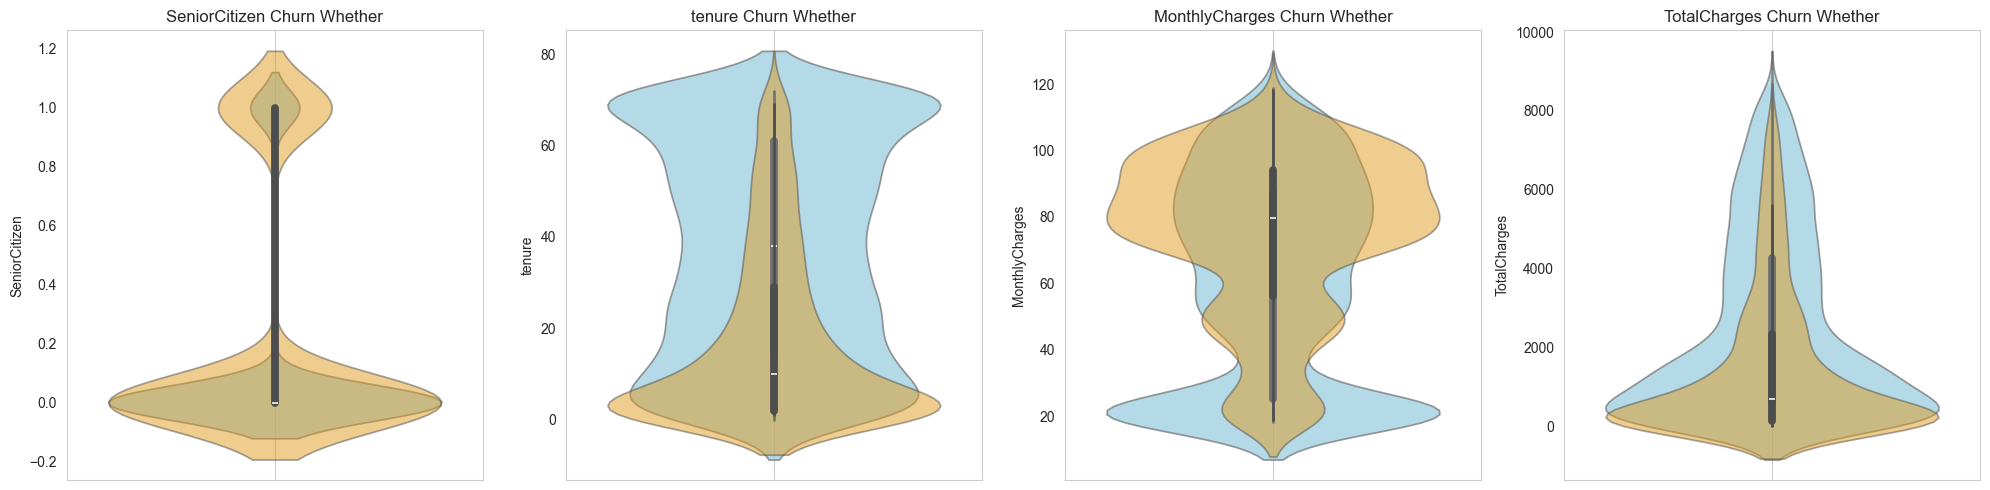

In [57]:
# 바이올린 플롯에 알파값을 주어 좀더 명확하게 비교되도록 구성해봅니다.
numeric_cols = ['SeniorCitizen','tenure','MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for idx, col in enumerate(numeric_cols[:]):
    axes[idx].set_title(col + ' Churn Whether')
    sns.violinplot(df_churn_no[numeric_cols[idx]],ax=axes[idx],color='skyblue',alpha=0.7)
    sns.violinplot(df_chrun_yes[numeric_cols[idx]],ax=axes[idx],color='orange', alpha=0.5)
    axes[idx].grid()
plt.tight_layout()

## 바이올린 플롯으로 분석
* 이탈 여부는 SeniorCitizen(노인여부)는 큰 차이가 없어 보입니다만 이탈한 고객들은 비노년층이 좀더 많습니다.
*  tenure(기간)는 이탈하지 않은 고객들이 70개월 이상의 기간을 상당수 가지고 있습니다.
하지만, 이탈자의 경우에는 20개월 미만이 압도적으로 많습니다.
* MonthlyCharges(월별 요금)는 이탈하지 않은 고객들이 20달러 이상 100달러 이하의 요금을 상당수 가지고 있습니다.
이탈자의 경우에는 40달러 이하에 많이 분포하고 40달러와 120달러사이에도 고르게 분포되어 있습니다.
* TotalCharges(총 요금)는 이탈하지 않은 고객들이 2000달러 이상의 요금에도 많이 분포되어있지만 이탈자와 비이탈자 모두 2000달러 이하에 상당수 분포되어있습니다.

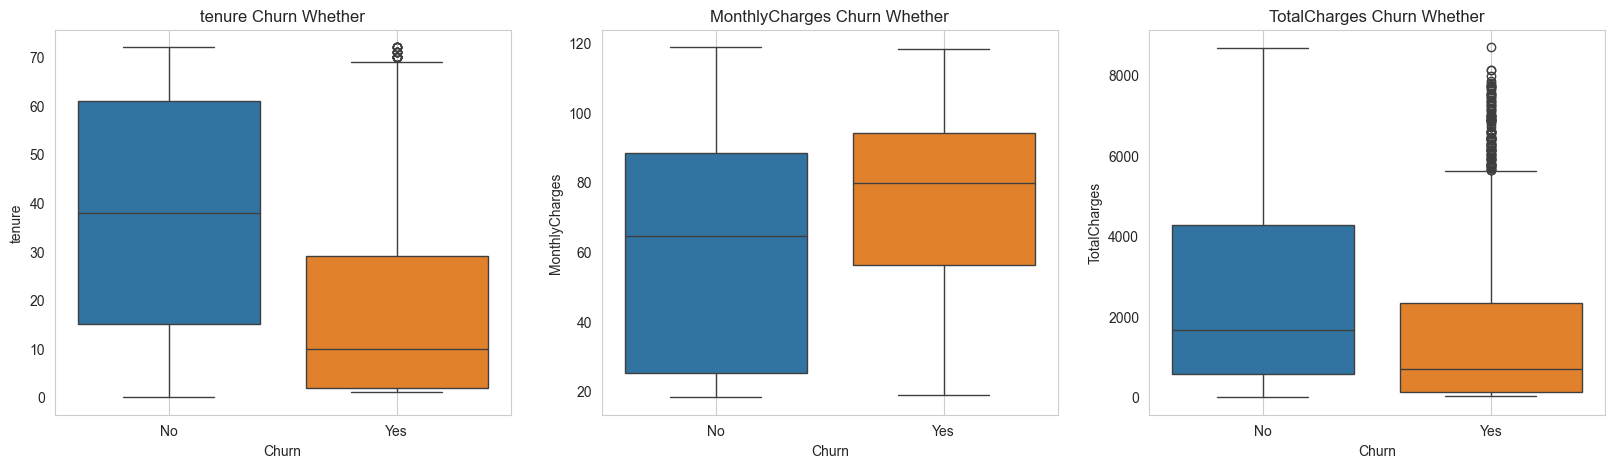

In [58]:
# 숫자형데이타에서 이상치등 탐색을 위해 boxplot으로 표현해봅니다.
numeric_cols = ['tenure','MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for idx, col in enumerate(numeric_cols[:]):
    axes[idx].set_title(col + ' Churn Whether')
    sns.boxplot(data = df, x = 'Churn', y = col, ax=axes[idx],hue='Churn')
    axes[idx].grid()

## 박스 플롯으로 분석
- 이탈인 경우 기간의 중앙값은 10개월 정도이고 비이탈은 40개월 미만에 있다
- 이탈의 경우 70개월이 넘는 값들이 있으므로 이상치인지 살펴볼 필요성이 있다
- 이탈의 경우 Total Charges가 6000을 넘는경우가 꽤있으므로 이상치인지 살펴볼 필요성이 있어보이지만 이것이 tenure의 높은수치와 일치하는것인지도 확인할 필요성이 있어보인다.

## 📌 미션 2)
* 범주형 변수가 타겟 변수에 어떤 영향을 미치는지 이해함으로써, 해당 변수의 중요성을 파악할 수 있습니다. 이는 피처 선택 과정에서 중요한 지표가 됩니다. 범주형 변수와 정답 값 간의 관계를 분석함으로써 비즈니스 의사결정, 데이터 전략 수립, 모델 설계에 활용할 수 있습니다. 범주형 변수가 타겟 변수와 강한 관계를 보일 경우, 이는 모델의 예측 성능을 향상시킬 수 있는 중요한 피처임을 알아볼 수 있습니다. 범주형 변수와 정답 값 간의 비교를 통해 예상치 못한 패턴이나 이상치를 발견할 수 있습니다. 이는 데이터 전처리 과정에서 문제점을 해결하고 데이터의 품질을 개선하는 데 도움이 됩니다.
* 주요 범주형 변수와 타겟값인 이탈여부를 분석하는 시각화를 진행하고 그 과정에서 알게된 점을 정리해 주세요.

<img src="https://i.imgur.com/Q1KpQpP.png" width="500">

In [59]:
nunique = df.nunique()
category_col = nunique[nunique < 5]
category_col

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [60]:
# 다음의 코드를 실행하면 범주형 변수를 볼 수 있습니다.
# 위 예시처럼 시각화를 여기에 구현해 주세요.
category_col_name = category_col.index.tolist()
category_col_name

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

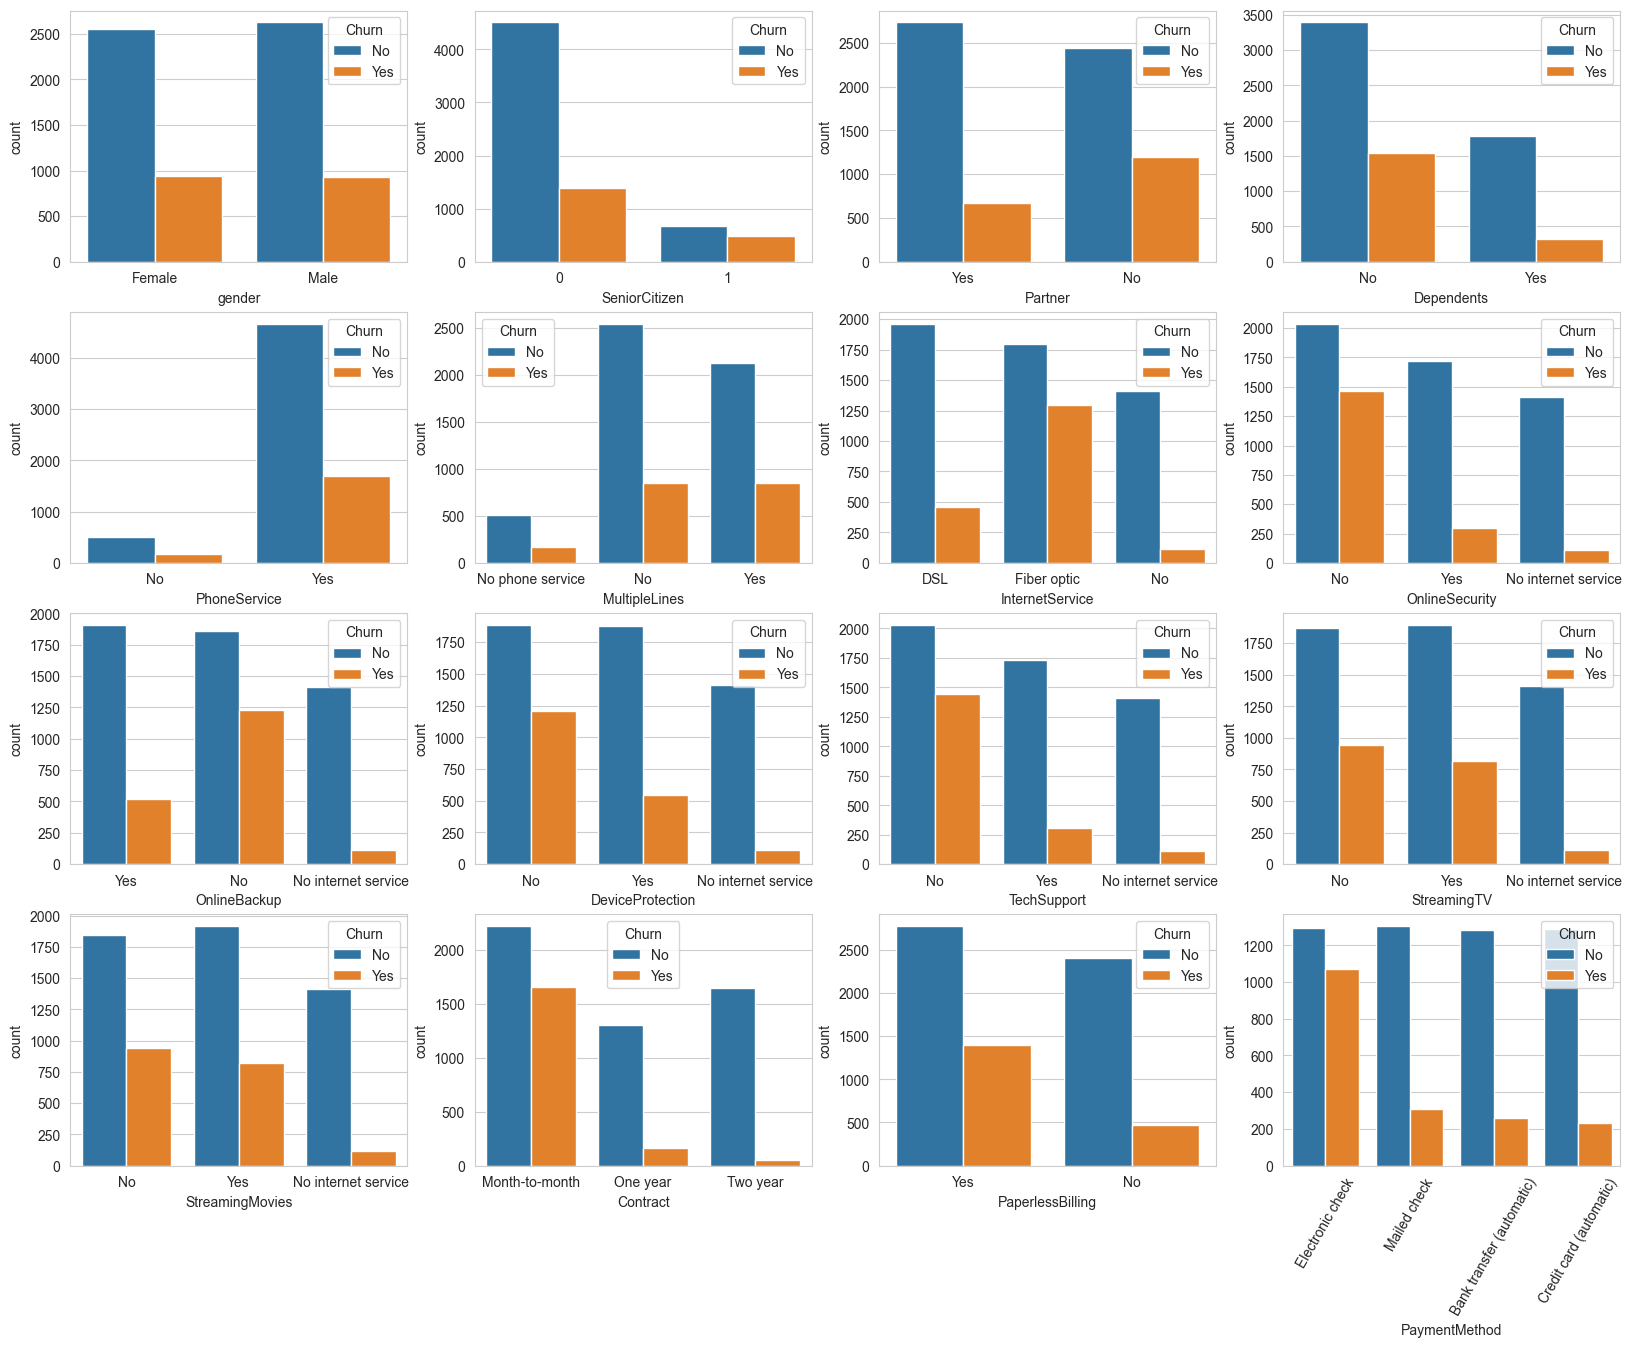

In [61]:
fig, axes = plt.subplots(nrows=4,ncols=4,figsize=(20,15))
category_list = category_col_name[:-1]

for i in range(len(category_col_name)-1):
  row = i // 4
  col = i % 4
  sns.countplot(x=df[category_list[i]], data=df, hue='Churn', ax=axes[row][col])
  plt.xticks(rotation=60)

plt.show()

## 그래프 분석
- 이탈율은 성별에 의해서 큰 차이가 나타나지 않습니다.
즉 성별에 따른 서비스의 차이로 인한 문제는 두드러지지 않는다고 보입니다.
- (이탈율은 -이하생략)노인층이 아닌 고객들이 더 많이 나타납니다.
노인을 위한 서비스가 잘 마련되어있거나, 또는 노년층의 갈아타지 않는 성향이 반영된 것으로 보입니다.
- 배우자가 없는 고객들이 이탈율이 더 많이 나타납니다. 즉 배우자와 동일한 서비스를 이용할때의 혜택등으로 배우자의 연계효과가 크다는 것을 추측할수있습니다.

- 부양가족이 없는 고객들이 더 많이 나타납니다.
부양가족또한 가족연계 서비스의 효과가 있다는것을 추측할수있습니다.
- 인터넷 서비스를 사용하지 않는 고객들이 더 많이 나타납니다
- 보안 서비스를 사용하지 않는 고객들이 더 많이 나타납니다.
- 백업 서비스를 사용하지 않는 고객들이 더 많이 나타납니다.
- 기술 지원 서비스를 사용하지 않는 고객들이 더 많이 나타납니다.
- 스트리밍 TV 서비스를 사용하지 않는 고객들이 더 많이 나타납니다.
- 이스트리밍 영화 서비스를 사용하지 않는 고객들이 더 많이 나타납니다.
 -  여러가지 부가적인 서비스를 이용할 경우 고객이탈을 막는 효과가 크기때문에 고객유치에서 부가서비스를 적극 가입하도록 하는것이 사업에 유리하다는것을 알수있습니다.

- 계약기간이 짧은 고객들이 더 많이 나타납니다.
 - 계약기간또한 충성도에 매우 큰 영향을 줍니다.
- 종이없는 청구서를 사용하는 고객들이 더 많이 나타납니다.
- 전자 수표를 사용하는 고객들이 더 많이 나타납니다.



## 미션 3 - 수치변수 간의 관계를 파악하기 위해 그래프를 시각화 하고 상관계수를 구해주세요.


상관계수를 통해 변수들 간의 선형적 관계를 파악합니다. 높은 상관관계를 보이는 변수들을 식별하여, 중복되거나 불필요한 특징을 제거함으로써 모델의 성능을 최적화할 수 있습니다. 강한 상관관계를 가진 변수들을 식별하여, 다중공선성 문제를 방지합니다. 상관 행렬을 시각화하여 데이터의 패턴과 특성을 더 잘 이해하고, 피처엔지니어링에 어떻게 활용할지 시각화 결과를 해석해 보세요. 또, 아래 예시와 똑같이 구해도 되지만 다른 변수를 추가하거나 여러분만의 인사이트를 추가해서 구해도 좋습니다.


|                |   SeniorCitizen |    tenure |   MonthlyCharges |
|:---------------|----------------:|----------:|-----------------:|
| SeniorCitizen  |       1         | 0.0165669 |         0.220173 |
| tenure         |       0.0165669 | 1         |         0.2479   |
| MonthlyCharges |       0.220173  | 0.2479    |         1        |




<table>
    <tr>
        <td><img src="https://i.imgur.com/RTfJDJN.png" width="300"></td>
        <td><img src="https://i.imgur.com/41Y04lj.png" width="300"></td>
    </tr>
</table>

In [66]:
# 여기에 상관계수를 구하고 heatmap 으로 시각화 해주세요.
df_corr=df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']].corr()
df_corr.style.background_gradient()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


<Axes: >

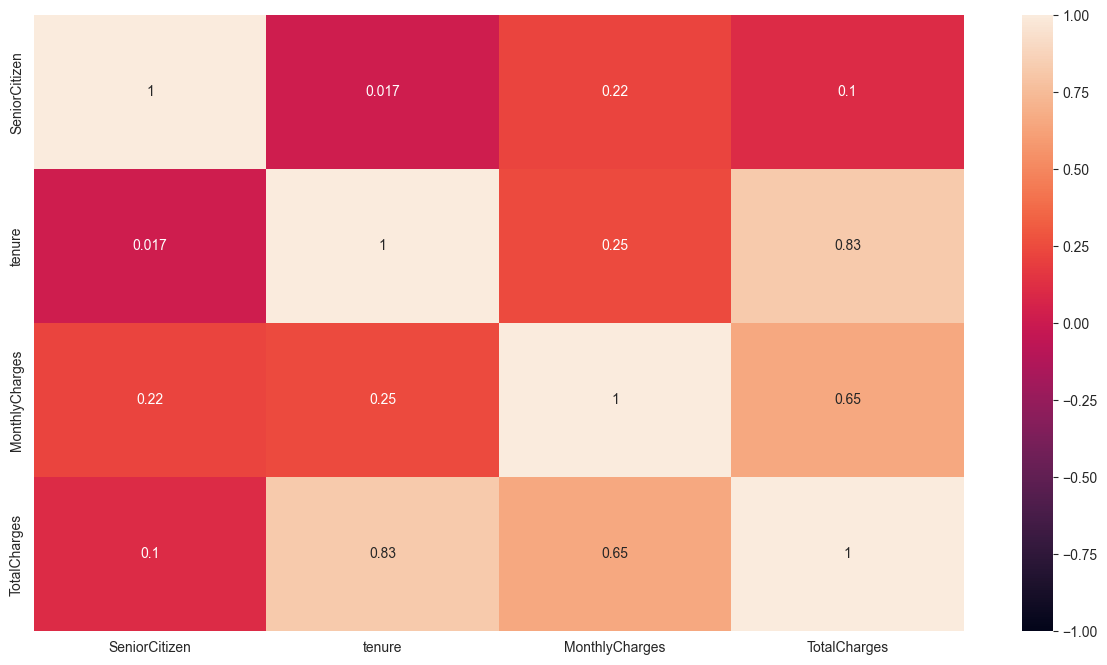

In [67]:
plt.figure(figsize = (15,8))
sns.heatmap(df_corr,vmax =1 ,vmin= -1, annot= True)

## 상관계수 분석
- 상관계수는 0.2이상이면 상관관계가 있다고 보는것이 일반적입니다.
- 상관계수를 보면 SeniorCitizen(노인여부)와 MonthlyCharges(월별요금)이 0.22로 약한 상관관계를 보입니다.
- tenure(기간)와 MonthlyCharges(월별요금)이 0.25로 약한 상관관계를 보입니다.
- tenure(기간)와 TotalCharges(총요금)이 0.83로 강한 상관관계를 보입니다.
- MonthlyCharges(월별요금)와 TotalCharges(총요금)이 0.65로 강한 상관관계를 보입니다.
- 강한 상관관계를 보이는 변수들은 다중공선성 문제를 야기할수있으므로 이를 해결하기위해 변수를 제거하거나 PCA를 통해 차원축소를 해야합니다.
- 
- 노인여부와 월별요금은 약한 상관관계를 보이므로 노인여부를 제거하거나 월별요금을 제거하거나 PCA를 통해 차원축소를 해야합니다.
- 기간과 월별요금은 약한 상관관계를 보이므로 기간을 제거하거나 월별요금을 제거하거나 PCA를 통해 차원축소를 해야합니다.
- 기간과 총요금은 강한 상관관계를 보이므로 기간을 제거하거나 총요금을 제거하거나 PCA를 통해 차원축소를 해야합니다.
- 월별요금과 총요금은 강한 상관관계를 보이므로 월별요금을 제거하거나 총요금을 제거하거나 PCA를 통해 차원축소를 해야합니다.

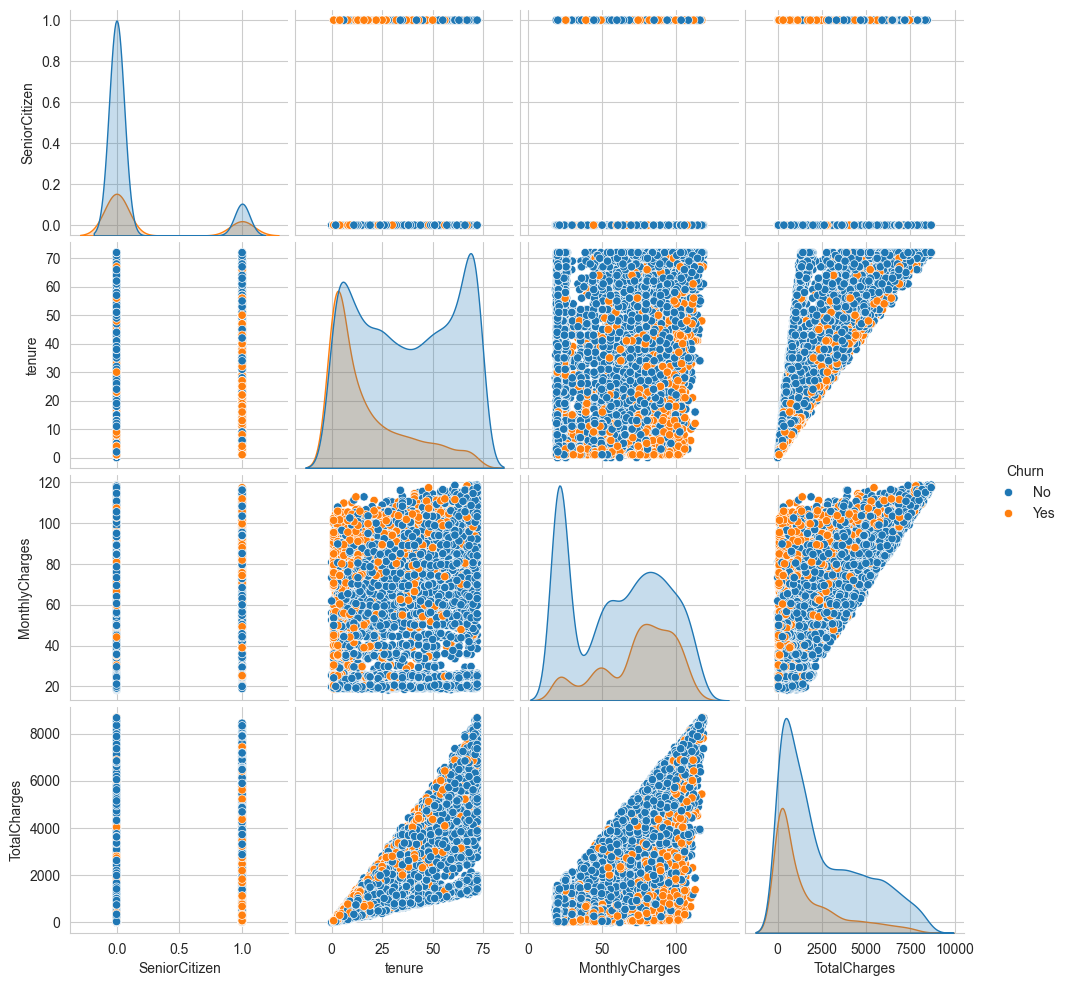

In [68]:
# seaborn 의 pairplot 으로 이탈여부(Churn)에 따라 시각화 해주세요.
sns.pairplot(data=df,hue='Churn')